In [ ]:
"""
    File : kdeCloneDiversityTumourSize.ipynb
    Plot : kernel density estimation of tumour states with respect to the number of clones and size
    Input : 
        SourceData_Fig5b.xlsx
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path_to_all_source_data = "../Source data for figures"

In [6]:
def plot_data(
    data
):
    for condition in data.Condition.unique():
        print(f'{condition} Growth')
        data_cond = data.loc[
            data.Condition == condition
        ]
        macrodiv_plot = data_cond.loc[
            data_cond.SliceDiameter >= 20
        ]
        if condition == 'Surface':
            color = 'red'
        elif condition == 'Volume':
            color = 'blue'
            
        jp = sns.jointplot(
            data = macrodiv_plot,
            x = "SliceDiameter", y = "NumberSubclone",
            color = color,
            kind="kde",
            fill=True,
            height = 2.75,
            levels = 10,
            thresh = 0.05
        )
        
        jp.set_axis_labels('Diameter of tumour slice (mm)', 'Number of subclones', fontsize=8)

        jp.ax_marg_x.set_xlim(-10, 160)
        jp.ax_marg_y.set_ylim(-2, 15)

        plt.show()



# Figure 5b

In [3]:
path_to_excelfile = os.path.join(
    path_to_all_source_data,
    "Source_Data_Figure_5",
    "SourceData_Fig5b.xlsx"
)

In [4]:
excelfile = pd.ExcelFile(path_to_excelfile)
excelfile.sheet_names

['SourceDataFig5b']

In [5]:
data = pd.read_excel(
    excelfile, 
    sheet_name=excelfile.sheet_names[0]
)

Surface Growth


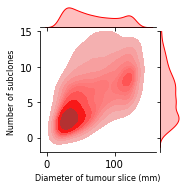

Volume Growth


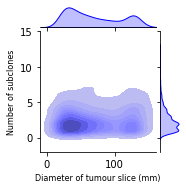

In [7]:
plot_data(data)